In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import sklearn
from skimage.filters import threshold_otsu
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert
from skimage.feature import canny
from scipy import ndimage as ndi

In [0]:
from google.colab import files

uploaded = files.upload()

In [34]:
!unzip mnistasjpg.zip

Archive:  mnistasjpg.zip
replace testSample/img_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import cv2
import os
#### this function will import the data from the folder
### lot of image may create memoty overflow
## taking 10 image each
def load__partial_images_from_folder(folder,target):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append([img,target])
    return images[:10]

In [36]:
!ls

mnistasjpg.zip	testSample  testSet.tar.gz  trainingSet
sample_data	testSet     trainingSample  trainingSet.tar.gz


In [0]:
zero = load__partial_images_from_folder("./trainingSet/trainingSet/0/",0)
one = load__partial_images_from_folder("./trainingSet/trainingSet/1/",1)
two = load__partial_images_from_folder("./trainingSet/trainingSet/2/",2)
three = load__partial_images_from_folder("./trainingSet/trainingSet/3/",3)
four = load__partial_images_from_folder("./trainingSet/trainingSet/4/",4)
five = load__partial_images_from_folder("./trainingSet/trainingSet/5/",5)
six = load__partial_images_from_folder("./trainingSet/trainingSet/6/",6)
seven = load__partial_images_from_folder("./trainingSet/trainingSet/7/",7)
eight = load__partial_images_from_folder("./trainingSet/trainingSet/8/",8)
nine = load__partial_images_from_folder("./trainingSet/trainingSet/9/",9)


In [0]:
tmp = [one,two,three,four,five,six,seven,eight,nine]

In [0]:

## extending the zero with all other 
## then assign to another 
for item in tmp:
    zero.extend(item)
    

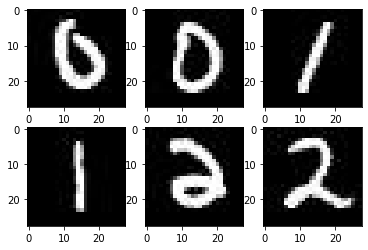

In [40]:
plt.subplot(231)
plt.imshow(zero[0][0])
plt.subplot(232)
plt.imshow(zero[6][0])
plt.subplot(233)
plt.imshow(zero[11][0])
plt.subplot(234)
plt.imshow(zero[16][0])
plt.subplot(235)
plt.imshow(zero[21][0])
plt.subplot(236)
plt.imshow(zero[26][0])
plt.show()

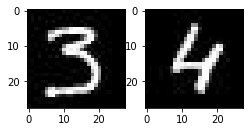

In [41]:
plt.subplot(231)
plt.imshow(zero[32][0])
plt.subplot(232)
plt.imshow(zero[49][0])
plt.show()

In [0]:
def gray(image):
    image = image[0]
    image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image)

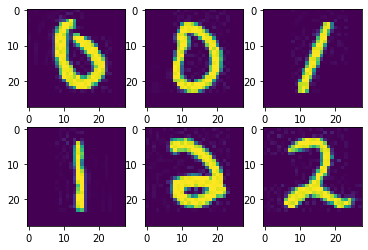

In [43]:
plt.subplot(231)
gray(zero[0])
plt.subplot(232)
gray(zero[6])
plt.subplot(233)
gray(zero[11])
plt.subplot(234)
gray(zero[16])
plt.subplot(235)
gray(zero[21])
plt.subplot(236)
gray(zero[26])
plt.show()

In [0]:
def otsu(image):
    image = image[0]
    image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = threshold_otsu(image)
    binary = image > thresh

    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')


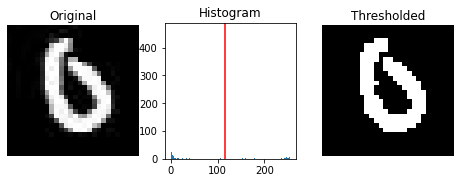

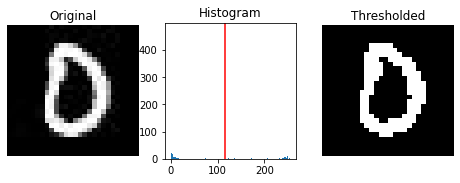

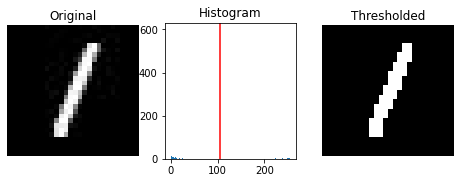

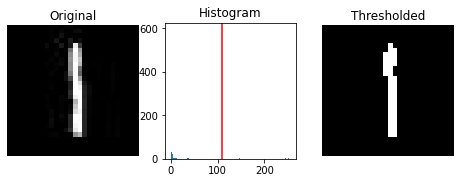

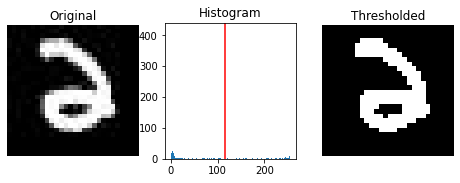

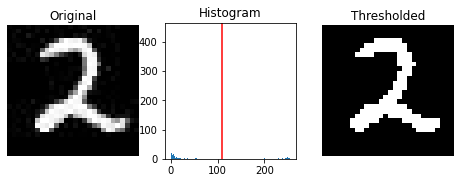

In [45]:
otsu(zero[0])
otsu(zero[6])
otsu(zero[11])
otsu(zero[16])
otsu(zero[21])
otsu(zero[26])


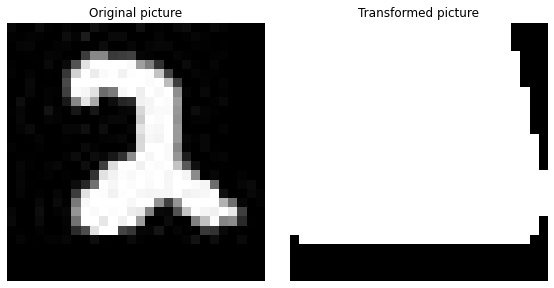

In [46]:
## The convex hull of a binary image is the set of pixels included in the smallest convex polygon that surround all white pixels in the input



# The original image is inverted as the object must be white.
image = zero[20][0]

chull = convex_hull_image(image).astype(np.float)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

In [0]:
## edge segmentation



In [0]:
def edge_based_segmentation(image):
    im = cv2.cvtColor(image[0], cv2.COLOR_BGR2GRAY)
    edges = canny(im/255.)
    fill_coins = ndi.binary_fill_holes(edges)
    plt.imshow(fill_coins.astype('float'))

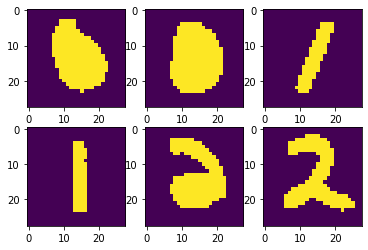

In [48]:
plt.subplot(231)
edge_based_segmentation(zero[0])
plt.subplot(232)
edge_based_segmentation(zero[6])
plt.subplot(233)
edge_based_segmentation(zero[11])
plt.subplot(234)
edge_based_segmentation(zero[16])
plt.subplot(235)
edge_based_segmentation(zero[21])
plt.subplot(236)
edge_based_segmentation(zero[26])
plt.show()

In [0]:
def hist(image):
    ax = plt.hist(image[0].ravel())

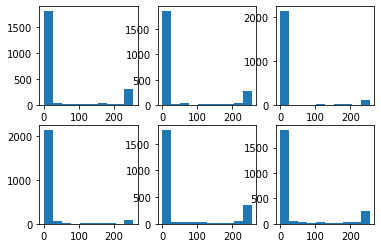

In [50]:
plt.subplot(231)
hist(zero[0])
plt.subplot(232)
hist(zero[6])
plt.subplot(233)
hist(zero[11])
plt.subplot(234)
hist(zero[16])
plt.subplot(235)
hist(zero[21])
plt.subplot(236)
hist(zero[26])
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [0]:
feature_matrix = []
target = []
for x,y in zero:
    image= cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    feature_matrix.append(image)
    target.append(y)
    

In [0]:
X=[]
IMG_SIZE= 32
for x in feature_matrix:
    new_array = cv2.resize(x,(IMG_SIZE,IMG_SIZE))
    X.append(new_array)

In [0]:
## normalization
Xx = []
for x in X:
    tmp = x/255
    Xx.append(tmp)


In [0]:
x_train,x_test,y_train,y_test = train_test_split(Xx,target)

In [56]:
np.array(x_train).shape

(75, 32, 32)

In [0]:
nsamples, nx, ny = np.array(x_train).shape
x_train = np.array(x_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_test).shape
x_test = np.array(x_test).reshape((nsamples,nx*ny))

In [0]:
model = KNeighborsClassifier(n_neighbors=2)

In [59]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [60]:
model.score(x_test,y_test)

0.64

In [62]:
model.predict(x_test)

array([9, 3, 0, 4, 0, 8, 6, 7, 1, 7, 2, 3, 1, 2, 4, 8, 9, 4, 7, 5, 1, 4,
       3, 0, 0])

In [63]:
y_test

[9, 5, 2, 7, 0, 8, 5, 7, 1, 9, 2, 3, 1, 2, 4, 8, 4, 9, 9, 5, 1, 4, 3, 3, 0]